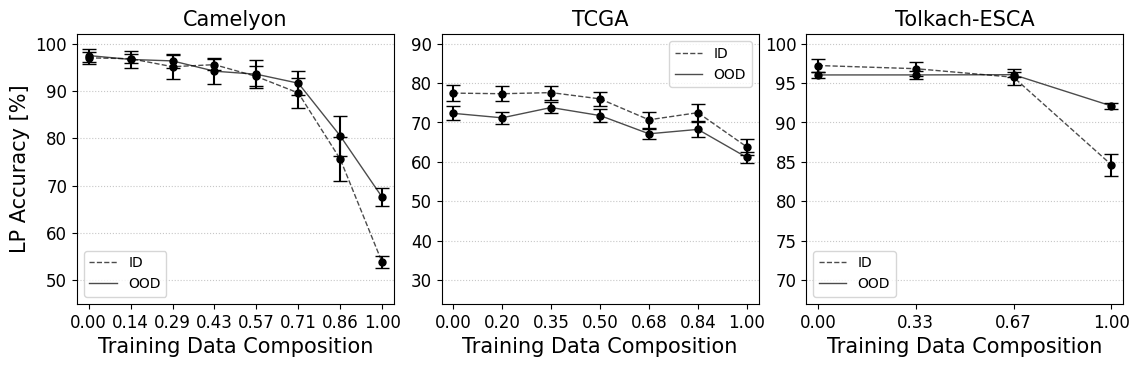

In [5]:
import json

import numpy as np
import scipy
import matplotlib.pyplot as plt


datasets = ['camelyon', 'tcga', 'tolkach_esca']
model = 'phikonv2_clsmean'

fslabels = 15
fsticks  = 12
fslegend = 15
fig, ax = plt.subplots(1,len(datasets), figsize=(13.5/3 * len(datasets),3.5), gridspec_kw={'wspace': 0.15})

for i, dataset in enumerate(datasets):
    # Load results
    with open(f'../../results/apd/{model}/{dataset}_raw.json', 'r') as file:
        results = json.load(file) 
    results_ID = results['ID_test_accuracies']
    results_OOD = results['OOD_test_accuracies']
    acc_means_ID, acc_means_OOD = {}, {}
    if dataset == "camelyon":
        acc_means_ID = {'x': [7/14 * 100, 8/14 * 100, 9/14 * 100, 10/14 * 100, 11/14 * 100, 12/14 * 100, 13/14 * 100, 14/14 * 100], 'y': [np.mean(res) for res in results_ID]}
        acc_means_OOD = {'x': [7/14 * 100, 8/14 * 100, 9/14 * 100, 10/14 * 100, 11/14 * 100, 12/14 * 100, 13/14 * 100, 14/14 * 100], 'y': [np.mean(res) for res in results_OOD]}
    elif dataset == "tcga":
        acc_means_ID = {'x': [6/12 * 100, 7/12 * 100, 8/12 * 100, 9/12 * 100, 10/12 * 100, 11/12 * 100, 12/12 * 100], 'y': [np.mean(res) for res in results_ID]}
        acc_means_OOD = {'x': [6/12 * 100, 7/12 * 100, 8/12 * 100, 9/12 * 100, 10/12 * 100, 11/12 * 100, 12/12 * 100], 'y': [np.mean(res) for res in results_OOD]}
    elif dataset == "tolkach_esca":
        acc_means_ID = {'x': [3/6 * 100, 4/6 * 100, 5/6 * 100, 6/6 * 100], 'y': [np.mean(res) for res in results_ID]}
        acc_means_OOD = {'x': [3/6 * 100, 4/6 * 100, 5/6 * 100, 6/6 * 100], 'y': [np.mean(res) for res in results_OOD]}
    std_ID, std_OOD = [np.std(res, ddof=1) for res in results_ID], [np.std(res, ddof=1) for res in results_OOD]
    ci_ID, ci_OOD = scipy.stats.t.ppf(0.975, df=len(results_ID[0])-1) * (std_ID / np.sqrt(len(results_ID[0]))), scipy.stats.t.ppf(0.975, df=len(results_OOD[0])-1) * (std_OOD / np.sqrt(len(results_OOD[0])))
    
    # Plot scatter plots
    x_ID, y_ID = acc_means_ID['x'], acc_means_ID['y']
    x_OOD, y_OOD = acc_means_OOD['x'], acc_means_OOD['y']
    ax[i].scatter(x_ID, y_ID, color='black', marker='o', s=10)
    ax[i].plot(x_ID, y_ID, linestyle='--', label='ID', color='black', lw=1, alpha=0.7)
    ax[i].errorbar(x_ID, y_ID, yerr=ci_ID, fmt='o', color='black', capsize=5, markersize=5)
    ax[i].scatter(x_OOD, y_OOD, color='black', marker='o', s=10)
    ax[i].plot(x_OOD, y_OOD, linestyle='-', label='OOD', color='black', lw=1, alpha=0.7)
    ax[i].errorbar(x_OOD, y_OOD, yerr=ci_OOD, fmt='o', color='black', capsize=5, markersize=5)

    # Adjust plots according to dataset
    if dataset == "camelyon":
        ax[i].set_title('Camelyon', fontsize=fslabels)
        ax[i].set_ylabel('LP Accuracy [%]', fontsize=fslabels)
        ax[i].set_yticks(np.round(np.arange(0.50, 1.01, 0.10), 2), labels=(range(50, 101, 10)), fontsize=fsticks)
        ax[i].set_xticks([7/14 * 100, 8/14 * 100, 9/14 * 100, 10/14 * 100, 11/14 * 100, 12/14 * 100, 13/14 * 100, 14/14 * 100])
        ax[i].set_xticklabels(['0.00', '0.14', '0.29', '0.43', '0.57', '0.71', '0.86', '1.00'], fontsize=fsticks)
        ax[i].set_xlabel('Training Data Composition', fontsize=fslabels)
        ax[i].set_xlim(48, 102)
        ax[i].set_ylim(0.45, 1.02)
        
    if dataset == "tcga":
        ax[i].set_title('TCGA', fontsize=fslabels)
        ax[i].set_yticks(np.round(np.arange(0.30, 0.91, 0.10), 2), labels=(range(30, 91, 10)), fontsize=fsticks)
        ax[i].set_xticks([6/12 * 100, 7/12 * 100, 8/12 * 100, 9/12 * 100, 10/12 * 100, 11/12 * 100, 12/12 * 100])
        ax[i].set_xticklabels(['0.00', '0.20', '0.35', '0.50', '0.68', '0.84', '1.00'], fontsize=fsticks)
        ax[i].set_xlabel('Training Data Composition', fontsize=fslabels)
        ax[i].set_xlim(48, 102)
        ax[i].set_ylim(0.24, 0.924)

    if dataset == "tolkach_esca":
        ax[i].set_title('Tolkach-ESCA', fontsize=fslabels)
        ax[i].set_yticks(np.round(np.arange(0.70, 1.01, 0.05), 2), labels=(range(70, 101, 5)), fontsize=fsticks)
        ax[i].set_xticks([3/6 * 100, 4/6 * 100, 5/6 * 100, 6/6 * 100])
        ax[i].set_xticklabels(['0.00', '0.33', '0.67', '1.00'], fontsize=fsticks)
        ax[i].set_xlabel('Training Data Composition', fontsize=fslabels)
        ax[i].set_xlim(48, 102)
        ax[i].set_ylim(0.67, 1.012)

    ax[i].legend()
    ax[i].grid(axis='y', linestyle=':', alpha=0.7)
    
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()